Лабораторная работа Кузнецовой Екатерины

БД: http://archive.ics.uci.edu/ml/machine-learning-databases/covtype/ - тут архив, в нем файл 'covtype.data', содержится 581012 строк и 55 столбцов

Данная база данных направлена на предсказание типа лесного покрова только по картографическим переменным (без данных дистанционного зондирования). Наблюдения определялись Лесной службой США(USFS). Пропущенных значений в базе нет. Одно наблюдение – участок размером 30х30 метров. Наблюдения имеют 12 признаков. Их типы и описания:

Name                                     Data Type    Measurement                       Description

Elevation                               quantitative    meters                       Elevation in meters
Aspect                                  quantitative    azimuth                      Aspect in degrees azimuth
Slope                                   quantitative    degrees                      Slope in degrees
Horizontal_Distance_To_Hydrology        quantitative    meters                       Horz Dist to nearest surface water features
Vertical_Distance_To_Hydrology          quantitative    meters                       Vert Dist to nearest surface water features
Horizontal_Distance_To_Roadways         quantitative    meters                       Horz Dist to nearest roadway
Hillshade_9am                           quantitative    0 to 255 index               Hillshade index at 9am, summer solstice
Hillshade_Noon                          quantitative    0 to 255 index               Hillshade index at noon, summer soltice
Hillshade_3pm                           quantitative    0 to 255 index               Hillshade index at 3pm, summer solstice
Horizontal_Distance_To_Fire_Points      quantitative    meters                       Horz Dist to nearest wildfire ignition points
Wilderness_Area (4 binary columns)      qualitative     0 (absence) or 1 (presence)  Wilderness area designation
Soil_Type (40 binary columns)           qualitative     0 (absence) or 1 (presence)  Soil Type designation
Cover_Type (7 types)                    integer         1 to 7                       Forest Cover Type designation

Пояснения к признакам:
Wilderness Areas:  	    1 -- Rawah Wilderness Area
                        2 -- Neota Wilderness Area
                        3 -- Comanche Peak Wilderness Area
                        4 -- Cache la Poudre Wilderness Area

Soil Types:             1 to 40 : based on the USFS Ecological
                        Landtype Units (ELUs) for this study area:

  Study Code USFS ELU Code			Description
	 1	   2702		Cathedral family - Rock outcrop complex, extremely stony.
	 2	   2703		Vanet - Ratake families complex, very stony.
	 3	   2704		Haploborolis - Rock outcrop complex, rubbly.
	 4	   2705		Ratake family - Rock outcrop complex, rubbly.
	 5	   2706		Vanet family - Rock outcrop complex complex, rubbly.
	 6	   2717		Vanet - Wetmore families - Rock outcrop complex, stony.
	 7	   3501		Gothic family.
	 8	   3502		Supervisor - Limber families complex.
	 9	   4201		Troutville family, very stony.
	10	   4703		Bullwark - Catamount families - Rock outcrop complex, rubbly.
	11	   4704		Bullwark - Catamount families - Rock land complex, rubbly.
	12	   4744		Legault family - Rock land complex, stony.
	13	   4758		Catamount family - Rock land - Bullwark family complex, rubbly.
	14	   5101		Pachic Argiborolis - Aquolis complex.
	15	   5151		unspecified in the USFS Soil and ELU Survey.
	16	   6101		Cryaquolis - Cryoborolis complex.
	17	   6102		Gateview family - Cryaquolis complex.
	18	   6731		Rogert family, very stony.
	19	   7101		Typic Cryaquolis - Borohemists complex.
	20	   7102		Typic Cryaquepts - Typic Cryaquolls complex.
	21	   7103		Typic Cryaquolls - Leighcan family, till substratum complex.
	22	   7201		Leighcan family, till substratum, extremely bouldery.
	23	   7202		Leighcan family, till substratum - Typic Cryaquolls complex.
	24	   7700		Leighcan family, extremely stony.
	25	   7701		Leighcan family, warm, extremely stony.
	26	   7702		Granile - Catamount families complex, very stony.
	27	   7709		Leighcan family, warm - Rock outcrop complex, extremely stony.
	28	   7710		Leighcan family - Rock outcrop complex, extremely stony.
	29	   7745		Como - Legault families complex, extremely stony.
	30	   7746		Como family - Rock land - Legault family complex, extremely stony.
	31	   7755		Leighcan - Catamount families complex, extremely stony.
	32	   7756		Catamount family - Rock outcrop - Leighcan family complex, extremely stony.
	33	   7757		Leighcan - Catamount families - Rock outcrop complex, extremely stony.
	34	   7790		Cryorthents - Rock land complex, extremely stony.
	35	   8703		Cryumbrepts - Rock outcrop - Cryaquepts complex.
	36	   8707		Bross family - Rock land - Cryumbrepts complex, extremely stony.
	37	   8708		Rock outcrop - Cryumbrepts - Cryorthents complex, extremely stony.
	38	   8771		Leighcan - Moran families - Cryaquolls complex, extremely stony.
	39	   8772		Moran family - Cryorthents - Leighcan family complex, extremely stony.
	40	   8776		Moran family - Cryorthents - Rock land complex, extremely stony.

Замечания:   First digit:  climatic zone             Second digit:  geologic zones
                1.  lower montane dry                   1.  alluvium
                2.  lower montane                       2.  glacial
                3.  montane dry                         3.  shale
                4.  montane                             4.  sandstone
                5.  montane dry and montane             5.  mixed sedimentary
                6.  montane and subalpine               6.  unspecified in the USFS ELU Survey
                7.  subalpine                           7.  igneous and metamorphic
                8.  alpine                              8.  volcanic

        The third and fourth ELU digits are unique to the mapping unit 
        and have no special meaning to the climatic or geologic zones.
        
В БД 7 классов:       1 -- Spruce/Fir
                      2 -- Lodgepole Pine
                      3 -- Ponderosa Pine
                      4 -- Cottonwood/Willow
                      5 -- Aspen
                      6 -- Douglas-fir
                      7 -- Krummholz

In [1]:
#подключаем библиотеки
import numpy as np # большие многомерные массивы и матрицы, мат. функции для операций с этими данными
import matplotlib.pyplot as plt # визуализация данных 2D-графикой (3D тоже поддерживается)
import pandas as pd # анализ и обработка данных (таблицы DataFrame)
%matplotlib inline 
#from sklearn import preprocessing # алгоритмы машинного обучения
#from sklearn.preprocessing import scale

In [2]:
# выгружаю свою БД
data = pd.read_csv('covtype.csv', sep = ',', engine='python', header= None)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,54
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
5,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
6,2606,45,7,270,5,633,222,225,138,6256,...,0,0,0,0,0,0,0,0,0,5
7,2605,49,4,234,7,573,222,230,144,6228,...,0,0,0,0,0,0,0,0,0,5
8,2617,45,9,240,56,666,223,221,133,6244,...,0,0,0,0,0,0,0,0,0,5
9,2612,59,10,247,11,636,228,219,124,6230,...,0,0,0,0,0,0,0,0,0,5


Вижу, что в базе содержатся бинарные данные. Для дальнейшей работы (для наглядности) можно произвести небольшое преобразование базы, которое позволит убрать бинарность и сократить количество столбцов, т.е. уменьшить размерность. Также дам названия столбцам, чтобы название каждого столбца совпадало с названием признака. Указанные преобразования я выполнила (для своего удобства) на языке программирования R в среде RStudio, ключевым моментом служил следующий код:
                                    Wilderness_Area <- 0 
                                    Soil_Type <- 0 
                                    for (i in 1:581012){ 
                                    for (j in 11:14) { 
                                    if (covtype[i,j]==1) Wilderness_Area[i]=j-10 }} 
                                    covt <- covtype[,-c(11:14)] 
                                    for (i in 1:581012){ 
                                    for (j in 11:50) { 
                                    if (covt[i,j]==1) Soil_Type[i]=j-10 }} 
                                    covti <- covt[,-c(11:50)] 
                                    forest <- cbind(covti[,1:10],Wilderness_Area, Soil_Type, covtype[,55]) 
В итоге получился набор данных, все так же содержащий 581012 наблюдений, 12 признаков, но уже 13 столбцов. Я сохранила обработанную БД в файл 'CoverType.csv'.

In [5]:
dataSet = pd.read_csv('CoverType.csv', sep = ',', engine='python')

In [6]:
dataSet

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,29,5
5,2579,132,6,300,-15,67,230,237,140,6031,1,29,2
6,2606,45,7,270,5,633,222,225,138,6256,1,29,5
7,2605,49,4,234,7,573,222,230,144,6228,1,29,5
8,2617,45,9,240,56,666,223,221,133,6244,1,29,5
9,2612,59,10,247,11,636,228,219,124,6230,1,29,5


In [7]:
dataSet.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,1,29,5
1,2590,56,2,212,-6,390,220,235,151,6225,1,29,5
2,2804,139,9,268,65,3180,234,238,135,6121,1,12,2
3,2785,155,18,242,118,3090,238,238,122,6211,1,30,2
4,2595,45,2,153,-1,391,220,234,150,6172,1,29,5


In [8]:
dataSet.tail()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
581007,2396,153,20,85,17,108,240,237,118,837,3,2,3
581008,2391,152,19,67,12,95,240,237,119,845,3,2,3
581009,2386,159,17,60,7,90,236,241,130,854,3,2,3
581010,2384,170,15,60,5,90,230,245,143,864,3,2,3
581011,2383,165,13,60,4,67,231,244,141,875,3,2,3


In [9]:
dataSet.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,2.114462,24.362443,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,1.061295,9.485405,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,20.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,29.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,3.000000,31.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,4.000000,40.000000,7.000000


In [10]:
dataSet['Cover_Type'] # просто выводим для пробы, чтобы посмотреть

0         5
1         5
2         2
3         2
4         5
5         2
6         5
7         5
8         5
9         5
10        5
11        2
12        2
13        5
14        5
15        5
16        5
17        5
18        5
19        5
20        5
21        2
22        5
23        5
24        5
25        5
26        5
27        2
28        2
29        5
         ..
580982    3
580983    3
580984    3
580985    3
580986    3
580987    3
580988    3
580989    3
580990    3
580991    3
580992    3
580993    3
580994    3
580995    3
580996    3
580997    3
580998    3
580999    3
581000    3
581001    3
581002    3
581003    3
581004    3
581005    3
581006    3
581007    3
581008    3
581009    3
581010    3
581011    3
Name: Cover_Type, Length: 581012, dtype: int64

In [11]:
correl = dataSet.corr()
correl

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area,Soil_Type,Cover_Type
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,-0.315590,0.689848,-0.269554
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,0.138703,0.007149,0.017080
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,0.286178,-0.105571,0.148285
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,0.056339,0.194685,-0.020317
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,0.189085,0.071313,0.081664
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,-0.445922,0.240829,-0.153450
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,-0.233455,0.040877,-0.035415
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,-0.080767,0.013662,-0.096426
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,0.105050,-0.001122,-0.048290
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,-0.416830,0.100952,-0.108936


Из таблицы корреляции видно, что никакие столбцы исключать не нужно из БД, т.к. все коэф-ты корреляции меньше 0.8. Более того, 
большинство из них по модулю находятся в диапозоне 0.01 - 0.4. Значит, первичная обработка указаннной БД завершена.

Все же было принято решение вернуться к работе с БД первоначального вида, с бинарными столбцами, чтобы нормализовать данные. 


In [12]:
# Нормализация количественных признаков ( 10 - 53 столбцы содержат бинарные признаки)
data_numerical = data.loc[:,0:9]

In [13]:
#numerical_columns = X.loc[:,0:9]
#binary_columns = X.loc[:,10:53]

In [14]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [15]:
data_numerical.describe()

,0,1,2,3,4,5,6,7,8,9
count,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05,5.810120e+05
mean,-4.947038e-14,1.393410e-14,-4.782946e-15,-4.584345e-14,6.174011e-14,7.474551e-15,3.232419e-14,-4.074829e-14,-1.820969e-15,-4.955602e-14
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-3.930090e+00,-1.390864e+00,-1.883447e+00,-1.267603e+00,-3.763925e+00,-1.507224e+00,-7.924801e+00,-1.129658e+01,-3.723841e+00,-1.495468e+00
25%,-5.370482e-01,-8.726080e-01,-6.815623e-01,-7.594858e-01,-6.761935e-01,-7.979110e-01,-5.284314e-01,-5.219725e-01,-6.147238e-01,-7.221679e-01
50%,1.308453e-01,-2.560616e-01,-1.473915e-01,-2.419589e-01,-2.816501e-01,-2.264842e-01,2.186767e-01,1.356328e-01,1.232510e-02,-2.041174e-01
75%,7.273064e-01,9.323539e-01,5.203219e-01,5.390361e-01,3.873583e-01,6.271286e-01,7.042970e-01,6.920681e-01,6.655010e-01,4.302302e-01
max,3.209585e+00,1.825899e+00,6.930371e+00,5.304988e+00,9.513319e+00,3.057135e+00,1.563471e+00,1.552013e+00,2.912426e+00,3.921407e+00


In [16]:
# Соединяем в одну таблицу все признаки
X = pd.concat((data_numerical, data.loc[:,10:53]), axis = 1)
print(X.shape)

(581012, 54)


In [17]:
# В последнем столбцы содержатся категориальные признаки, их нужно сделать бинарными
data[54].unique()
Y = pd.get_dummies(data[54])
#print(Y.columns)

Графики

In [18]:
data2 = pd.concat((X, Y), axis = 1)
data2.corr()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,1,2,3,4,5,6,7
0,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.217179,0.193595,0.212612,0.457994,-0.133892,-0.516612,-0.181038,-0.079150,-0.338662,0.275039
1,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.017706,0.008294,-0.005866,0.003259,-0.031347,0.047400,-0.011404,-0.018856,0.039027,-0.004137
2,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.072208,0.093602,0.025637,-0.098792,-0.072066,0.227971,0.040731,0.043675,0.115921,0.003889
3,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.043031,0.031922,0.147020,0.004017,0.048136,-0.071264,-0.052692,-0.034607,-0.090492,0.078808
4,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,-0.008629,0.043859,0.179006,-0.055381,-0.008946,0.070406,-0.006186,0.009267,-0.002955,0.075655
5,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,0.079778,0.033762,0.016052,0.128590,0.049664,-0.230937,-0.063473,-0.082687,-0.147809,0.047613
6,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,0.015108,-0.029620,-0.000016,-0.004167,0.061889,-0.097834,0.041709,0.054541,-0.126564,0.034454
7,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,0.042952,-0.071961,-0.040176,0.004272,0.099080,-0.097049,-0.022040,-0.027922,-0.119792,-0.015218
8,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.022187,-0.029040,-0.024254,0.026655,0.011602,-0.014459,-0.056068,-0.069390,0.026397,-0.037965
9,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.019740,-0.003301,0.008915,0.016568,0.138394,-0.206787,-0.058356,-0.039181,-0.122609,0.012964


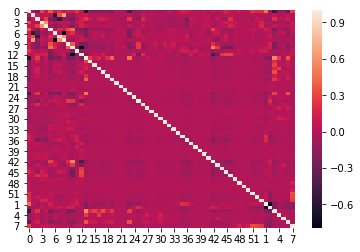

In [19]:
import seaborn as sns
sns.heatmap(data2.corr())

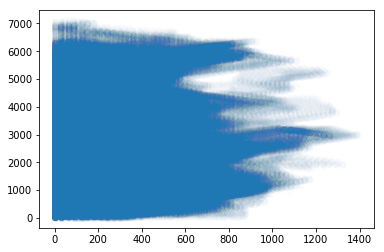

In [20]:
plt.plot(data[3], data[5], 'o', alpha = 0.01);

In [21]:
# Метод k-ближайших соседей (KNN)

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 42)

In [22]:
Y_train # просто для примера посмотрим на результат

,1,2,3,4,5,6,7
442216,0,1,0,0,0,0,0
20198,0,1,0,0,0,0,0
76896,0,1,0,0,0,0,0
349647,1,0,0,0,0,0,0
440763,1,0,0,0,0,0,0
540976,1,0,0,0,0,0,0
287820,1,0,0,0,0,0,0
504800,1,0,0,0,0,0,0
63536,0,1,0,0,0,0,0
499753,1,0,0,0,0,0,0


In [23]:
X_train.shape

(435759, 54)

In [24]:
Y_train.shape

(435759, 7)

In [25]:
X_test.shape

(145253, 54)

In [26]:
Y_test.shape

(145253, 7)

In [27]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [28]:
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=10, p=2,
           weights='uniform')

In [29]:
Y_train_predict = knn.predict(X_train)
Y_test_predict = knn.predict(X_test)

#err_train = np.mean(Y_train != Y_train_predict)
#err_test  = np.mean(Y_test  != Y_test_predict)

#print(err_train, err_test)

In [30]:
err_test = 1 - knn.score(X_test, Y_test)

In [31]:
err_test

0.10558818062277542

In [32]:
err_train = 1 - knn.score(X_train, Y_train)

In [33]:
err_train

0.08502865115809422

In [34]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 9, 15, 25]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)

In [ ]:
grid.fit(X_train, Y_train)


In [ ]:
 # я ждала 2 часа, перезапускала, но так и не дождалась результата....

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

In [ ]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

In [ ]:
#SVC

from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, Y_train)

err_train = np.mean(Y_train != svc.predict(X_train))
err_test  = np.mean(Y_test  != svc.predict(X_test))

print(err_train, err_test)

In [ ]:
#Подбор параметров
from sklearn.grid_search import GridSearchCV
Cs = 10.**np.arange(-3, 3)
gamma_array = 10.**np.arange(-3, 3)
svc = SVC()
grid = GridSearchCV(svc, param_grid = {'C': Cs, 'gamma': gamma_array})
grid.fit(X_train, Y_train)

best_cv_err = 1 - grid.best_score_
best_C = grid.best_estimator_.C
print(best_cv_err, best_C)

In [ ]:
svc = SVC(C = best_C).fit(X_train, Y_train)

err_train = np.mean(Y_train != knn.predict(X_train))
err_test  = np.mean(Y_test  != knn.predict(X_test))

print(err_train, err_test)

In [ ]:
#svc = SVC(C = best_C).fit(X_train, Y_train)

#err_train = np.mean(Y_train != knn.predict(X_train))
#err_test  = np.mean(Y_test  != knn.predict(X_test))

#print(err_train, err_test)

In [ ]:
#Random Forest
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, Y_train)

err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))

print(err_train, err_test)

In [ ]:
#Значимость признаков
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

print("Feature ranking:")

N, d = X_train.shape
feature_names = X.columns
for f in range(d):
    print("%2d. feature '%5s' (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))

In [ ]:
#Extremely Randomized Trees
ert = ensemble.ExtraTreesClassifier(n_estimators = 100).fit(X_train, Y_train)

err_train = np.mean(Y_train != ert.predict(X_train))
err_test  = np.mean(Y_test  != ert.predict(X_test))

print(err_train, err_test)

In [ ]:
#AdaBoost
ada = ensemble.AdaBoostClassifier(n_estimators = 1000)
ada.fit(X_train, Y_train)

err_train = np.mean(y_train != ada.predict(X_train))
err_test = np.mean(Y_test != ada.predict(X_test))

print(err_train, err_test)

In [ ]:
#GBT
gbt = ensemble.GradientBoostingClassifier(n_estimators = 1000)
gbt.fit(X_train, Y_train)

err_train = np.mean(Y_train != gbt.predict(X_train))
err_test = np.mean(Y_test != gbt.predict(X_test))

print(err_train, err_test)